In [5]:
!pip install pynput

    100% |████████████████████████████████| 4.9MB 4.4MB/s eta 0:00:01


In [1]:
from PIL import Image
import numpy as np
import cv2
from time import time, sleep
from pynput.mouse import Controller

In [ ]:
cv2.circle()

In [2]:
def where_is_mouse(release_time, waiting_time=1e-3):
    
    mouse = Controller()
    start = time()
    image = np.zeros((900, 1440, 3), np.uint8)
    
    l = []
    while True:
    
        l.append(mouse.position)
        sleep(waiting_time)
        
        cv2.circle(image, tuple(np.array(l[-1], dtype=np.int32)), 3, (255, 0, 0))
        cv2.imshow("Mouse tracking", image)
        k = cv2.waitKey(10) & 0XFF
        
        if time() - start > release_time:
            break
            
    cv2.destroyAllWindows()

In [4]:
class CalmanFilter(object):
    
    def __init__(self, waiting_time=0.2):
        
        #self.waiting_time = waiting_time
        self.waiting_time = waiting_time
        self.shape = (900, 1440, 3)
        
        self.A = np.array([[1.0, 0.0, 0.2, 0.0],
                           [0.0, 1.0, 0.0, 0.2],
                           [0.0, 0.0, 1.0, 0.0],
                           [0.0, 0.0, 0.0, 1.0]])
        
        self.B = np.eye(4)
        self.H = np.array([[1.0, 0.0, 1.0, 0.0],
                           [0.0, 1.0, 0.0, 1.0],
                           [0.0, 0.0, 0.0, 0.0],
                           [0.0, 0.0, 0.0, 0.0]])
        
        self.Q = np.array([[0.0, 0.0, 0.0, 0.0],
                           [0.0, 0.0, 0.0, 0.0],
                           [0.0, 0.0, 0.1, 0.0],
                           [0.0, 0.0, 0.0, 0.1]])
        
        self.R = 0.1 * np.eye(4)
        
        self.P = np.zeros((4, 4))
        self.x = np.zeros(4)
        
        self.mouse = Controller()
        
        self.measurements = []
        self.predictions = []
        
    def measure(self):
        
        position_x, position_y = self.mouse.position
        
        try:
            velocity_x = (position_x - self.predictions[-1][0]) / self.waiting_time
            velocity_y = (position_y - self.predictions[-1][1]) / self.waiting_time
        except IndexError:
            velocity_x = 0
            velocity_y = 0
        
        self.measurements.append(np.array([position_x,
                                          position_y,
                                          velocity_x,
                                          velocity_y]))
        
        return self.measurements[-1]
    
    def predict(self):
        
        self.x = self.A @ self.x
        self.P = self.A @ self.P @ self.A.transpose() + self.Q
        
        return self.x
        
    def correct(self):
        
        S = self.H @ self.P @ self.H.transpose() + self.R
        K = self.P @ self.H @ np.linalg.inv(S)
        y = self.measurements[-1] - self.H @ self.x
        
        self.x = self.x + K @ y
        self.P = (np.eye(4) - K @ self.H) @ self.P
        
        self.predictions.append(self.x)
        
    def mouse_tracking(self, release_time):
    
        start = time()
        image = np.zeros(self.shape, np.uint8)
        
        while True:
            
            self.measure()
            self.predict()
            self.correct()
            
            sleep(self.waiting_time)
            
            real_values = tuple(self.measurements[-1][:2].astype(np.int32))
            predicted_values = tuple(self.predictions[-1][:2].astype(np.int32))
            
            cv2.circle(image, real_values, 3, (255, 0, 0))
            cv2.circle(image, predicted_values, 3, (0, 255, 0))
            cv2.imshow("Mouse tracking", image)
            k = cv2.waitKey(10) & 0XFF

            if time() - start > release_time:
                break
            
        cv2.destroyAllWindows()

In [5]:
obj = CalmanFilter()
obj.mouse_tracking(20)

In [6]:
where_is_mouse(10)

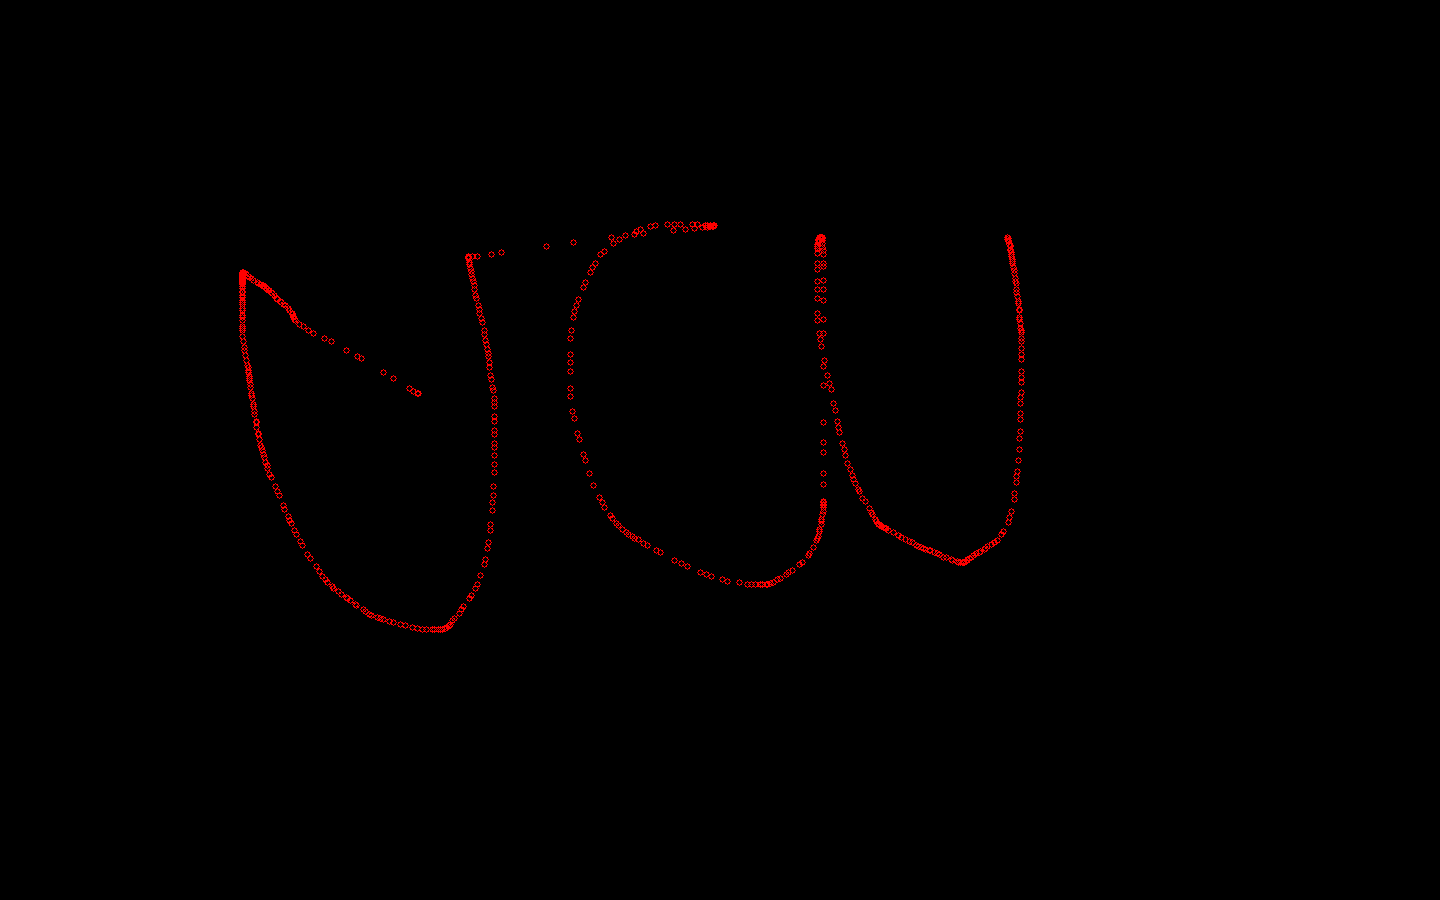

In [56]:
Image.fromarray(img)

In [ ]:
Controller()

In [23]:
from pynput.mouse import Button, Controller

mouse = Controller()

# Read pointer position
print('The current pointer position is {0}'.format(
    mouse.position))

# Set pointer position
mouse.position = (10, 20)
print('Now we have moved it to {0}'.format(
    mouse.position))

# Move pointer relative to current position
mouse.move(5, -5)

# Press and release
mouse.press(Button.left)
mouse.release(Button.left)

# Double click; this is different from pressing and releasing
# twice on Mac OSX
mouse.click(Button.left, 2)

# Scroll two steps down
mouse.scroll(0, 2)

The current pointer position is (1214.265625, 643.86328125)
Now we have moved it to (1214.265625, 643.86328125)
